<a href="https://colab.research.google.com/github/Samuela31/Machine-Learning-Lab/blob/main/ML_Lab_6_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
313  15691863  Female   46            41000          1
314  15706071    Male   51            23000          1
315  15654296  Female   50            20000          1
316  15755018    Male   36            33000          0
317  15594041  Female   49            36000          1

[318 rows x 5 columns]


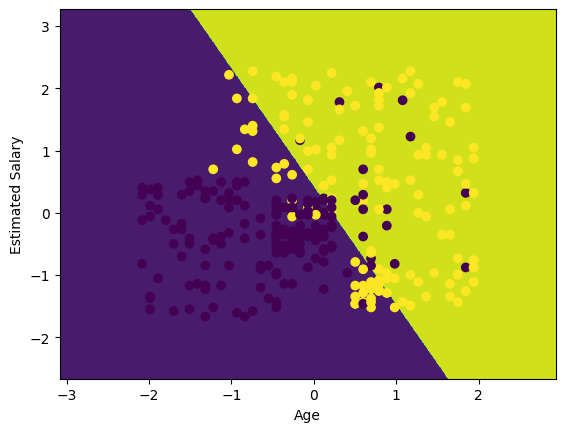

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

df= pd.read_csv('User_Data.csv')
print(df)

#getting independent variables and dependent variable
x= df[['Age','EstimatedSalary']]
y= df['Purchased']

#feature scaling
st_x= StandardScaler()
x= st_x.fit_transform(x)

#linear svm classifier
clf = SVC(kernel='linear')
clf.fit(x, y)

#creating range for independent variables and making 2D grid
x1, x2 = np.meshgrid(np.arange(x[:, 0].min() - 1, x[:, 0].max() + 1, step  =0.01),
np.arange(x[:, 1].min() - 1, x[:, 1].max() + 1, step = 0.01))

#making contour plot
#ravel is used to flatten multi-dimensional array to 1D array
#T means transpose, it is reshaped to match shape of x1
plt.contourf(x1, x2, clf.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape))

#c=y (target value) is used to differentiate classes using color
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
313  15691863  Female   46            41000          1
314  15706071    Male   51            23000          1
315  15654296  Female   50            20000          1
316  15755018    Male   36            33000          0
317  15594041  Female   49            36000          1

[318 rows x 5 columns]
0.0 1.9404392592674662
0.3829703581775584 -1.667764938422668


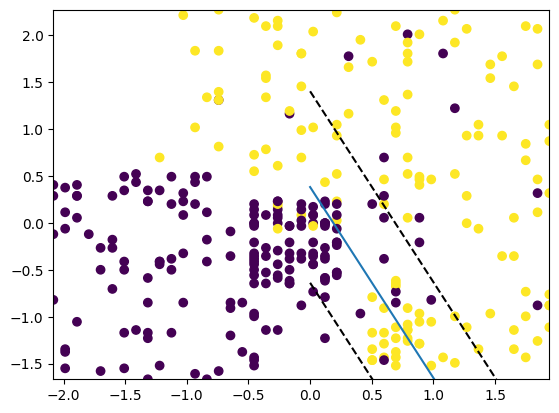

In [ ]:
'''# Create a simple dataset for demonstration
X = np.array([[11, 22], [12, 13], [24, 11], [15, 23], [26, 13], [13, 27], [14, 26], [16, 15]])
y = np.array([1, 1, 1, 1, -1, -1, -1, -1])'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("User_Data.csv")
print(df)

X=np.array(df[['Age','EstimatedSalary']])
y=np.array(df['Purchased'])

#Scale and fit the SVM model with a linear kernel
st_x= StandardScaler()
X= st_x.fit_transform(X)
clf = svm.SVC(kernel='linear', C=10)
clf.fit(X, y)

# Get the hyperplane and support vectors
w = clf.coef_[0]
b = clf.intercept_[0]
xp = np.linspace(0, 7, 100)
yp = - (w[0] * xp + b) / w[1]
margin = 1 / np.sqrt(np.sum(w ** 2))
lower = yp - np.sqrt(1 + w[0] ** 2) * margin
upper = yp + np.sqrt(1 + w[0] ** 2) * margin

print(xp.min(),X[:, 0].max())
print(yp.max(), X[:, 1].min())

#plot the hyperplane and support vectors
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlim(X[:, 0].min(),X[:, 0].max())
plt.ylim(X[:, 1].min(), X[:, 1].max())

#hyperplane
plt.plot(xp, yp)
#support vectors
plt.plot(xp, lower, 'k--') #'k--' for dotted lines
plt.plot(xp, upper, 'k--')
#plt.axis('tight') #if we remove we'll get close up plot
plt.show()
